# Team Pace Comparison
Rank team's race pace from the fastest to the slowest.


In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


# activate the fastf1 color scheme (and no other modifications)
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)
fastf1.Cache.enable_cache('cache')

Load the race session.
Pick all quick laps (within 107% of fastest lap).
For races with mixed conditions, pick_wo_box() is better.



In [2]:
race = fastf1.get_session(2024, "Jeddah", 'R')
race.load()
laps = race.laps.pick_quicklaps()
laps

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '22', '2', '3', '77', '24', '18', '10']


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:01:19.666000,VER,1,0 days 00:01:35.505000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.707000,...,True,Red Bull Racing,0 days 00:59:43.836000,2024-03-09 17:03:59.056,1,1.0,False,,False,False
1,0 days 01:02:53.871000,VER,1,0 days 00:01:34.205000,2.0,1.0,NaT,NaT,0 days 00:00:34.720000,0 days 00:00:29.628000,...,True,Red Bull Racing,0 days 01:01:19.666000,2024-03-09 17:05:34.886,1,1.0,False,,False,True
2,0 days 01:04:27.914000,VER,1,0 days 00:01:34.043000,3.0,1.0,NaT,NaT,0 days 00:00:34.530000,0 days 00:00:29.621000,...,True,Red Bull Racing,0 days 01:02:53.871000,2024-03-09 17:07:09.091,1,1.0,False,,False,True
3,0 days 01:06:01.668000,VER,1,0 days 00:01:33.754000,4.0,1.0,NaT,NaT,0 days 00:00:34.416000,0 days 00:00:29.541000,...,True,Red Bull Racing,0 days 01:04:27.914000,2024-03-09 17:08:43.134,1,1.0,False,,False,True
4,0 days 01:07:35.623000,VER,1,0 days 00:01:33.955000,5.0,1.0,NaT,NaT,0 days 00:00:34.457000,0 days 00:00:29.590000,...,True,Red Bull Racing,0 days 01:06:01.668000,2024-03-09 17:10:16.888,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,0 days 02:14:48.836000,PIA,81,0 days 00:01:32.557000,46.0,2.0,NaT,NaT,0 days 00:00:34.112000,0 days 00:00:29.071000,...,False,McLaren,0 days 02:13:16.279000,2024-03-09 18:17:31.499,1,4.0,False,,False,True
897,0 days 02:16:21.410000,PIA,81,0 days 00:01:32.574000,47.0,2.0,NaT,NaT,0 days 00:00:34.006000,0 days 00:00:29.145000,...,False,McLaren,0 days 02:14:48.836000,2024-03-09 18:19:04.056,1,4.0,False,,False,True
898,0 days 02:17:54.067000,PIA,81,0 days 00:01:32.657000,48.0,2.0,NaT,NaT,0 days 00:00:34.010000,0 days 00:00:29.151000,...,False,McLaren,0 days 02:16:21.410000,2024-03-09 18:20:36.630,1,4.0,False,,False,True
899,0 days 02:19:26.655000,PIA,81,0 days 00:01:32.588000,49.0,2.0,NaT,NaT,0 days 00:00:34.052000,0 days 00:00:29.094000,...,False,McLaren,0 days 02:17:54.067000,2024-03-09 18:22:09.287,1,4.0,False,,False,True


Convert the lap time column from timedelta to integer.
This is a seaborn-specific modification.
If plotting with matplotlib, set mpl_timedelta_support to true
with plotting.setup_mpl.



In [3]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

Index(['Red Bull Racing', 'Ferrari', 'McLaren', 'Mercedes', 'Aston Martin',
       'Haas F1 Team', 'Kick Sauber', 'Alpine', 'Williams', 'RB'],
      dtype='object', name='Team')


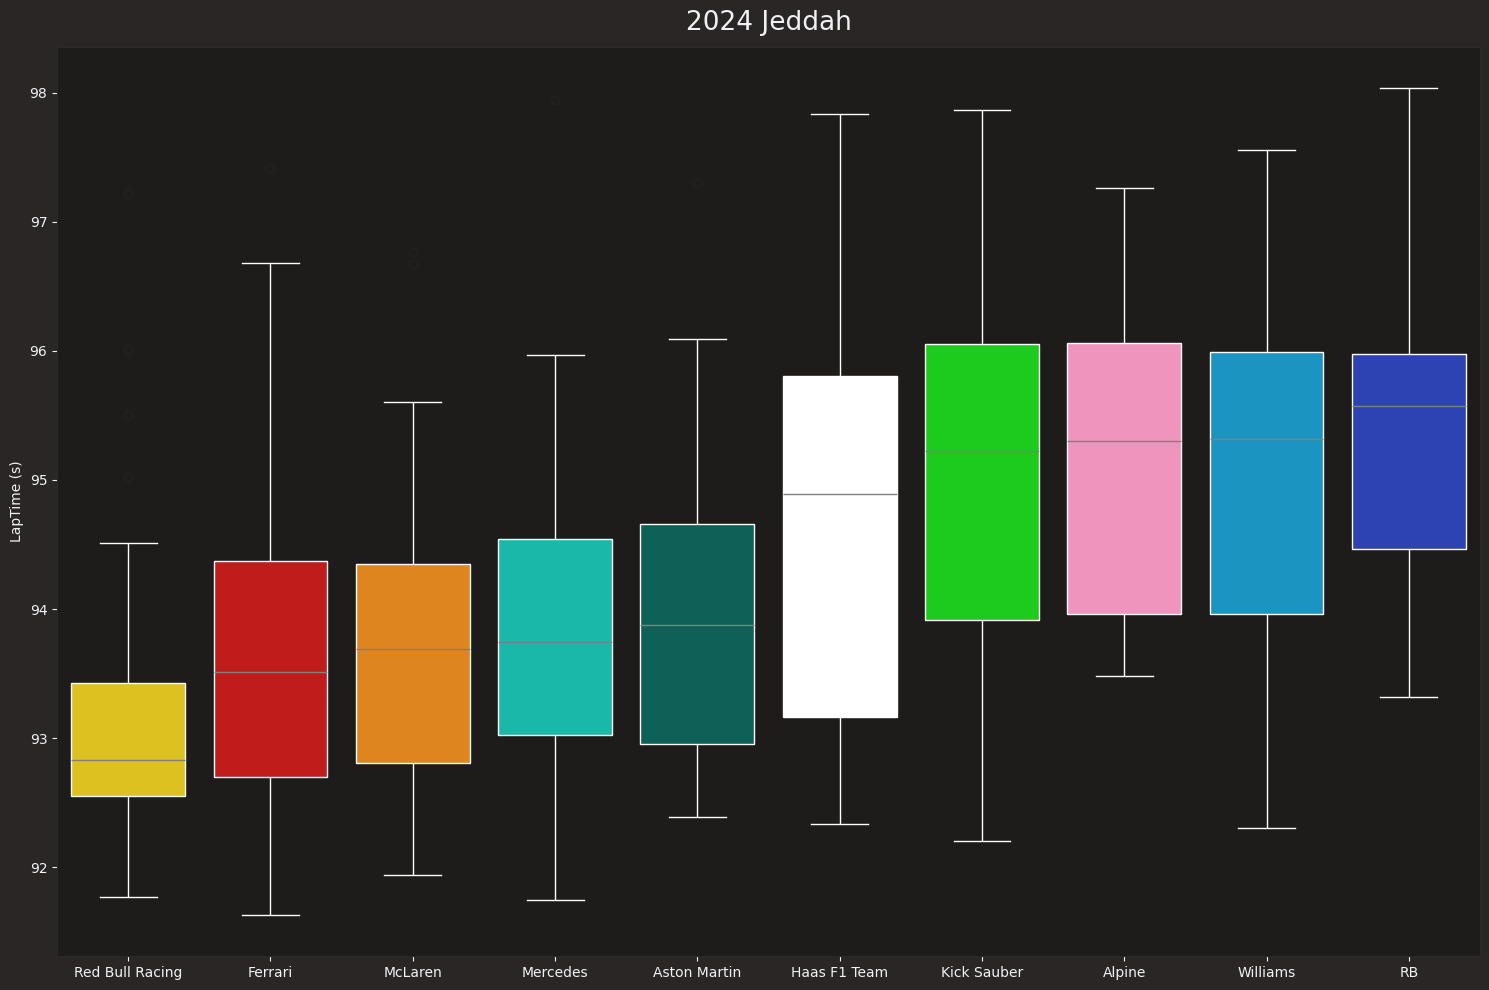

In [4]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2024 Jeddah")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()